In [51]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.feature_selection import SelectKBest
from sklearn.cross_validation import train_test_split 
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [47]:
cereal_data = pd.read_csv("cereals.csv")
names = cereal_data.columns

In [48]:
for name in names[3:]:
    cereal_data[name] = cereal_data[name]/cereal_data.weight
cereal_data["hot_cereal_flag"] = cereal_data.type.map({"C": 0, "H": 1})
modeling_names = list(names[3:])
modeling_names.append("hot_cereal_flag")
model_data = cereal_data[modeling_names]
model_data = model_data.dropna()
model_data.head()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,hot_cereal_flag
0,70,4,1,130,10,5,6,280,25,3,1,0.33,0
1,120,3,5,15,2,8,8,135,0,3,1,1.00,0
2,70,4,1,260,9,7,5,320,25,3,1,0.33,0
3,50,4,0,140,14,8,0,330,25,3,1,0.50,0
4,110,2,2,200,1,14,8,-1,25,3,1,0.75,0


In [4]:
carbo_predict = model_data[cereal_data.carbo.notnull()]
sugars_predict = model_data[cereal_data.sugars.notnull()]
potass_predict = model_data[cereal_data.potass.notnull()]

In [29]:
def best_linear_regression_model(data, target, variables, max_vars=5):
    train, test = train_test_split(data)
    regr1 = linear_model.LinearRegression()
    top_score = 0
    top_model = regr1.fit(train[variables], train[target])
    for num_vars in range(1, max_vars+1):
        pipe = Pipeline([("var_select", SelectKBest(k=num_vars)), ("model", linear_model.LinearRegression(fit_intercept=False))])
        pipe.fit(train[variables], train[target])
        score = pipe.score(test[variables], test[target])
        if abs(score) > top_score:
            top_score = score
            top_model = pipe
    return top_model, top_score

In [31]:
best_linear_regression_model(model_data, "protein", ["calories", "vitamins", "sodium"], 3)

(Pipeline(steps=[('var_select', SelectKBest(k=3, score_func=<function f_classif at 0x10ea1d510>)), ('model', LinearRegression(copy_X=True, fit_intercept=False, n_jobs=1, normalize=False))]),
 -0.64151151611180501)

### The above function can be used to determine the best linear regression model given a number of inputs

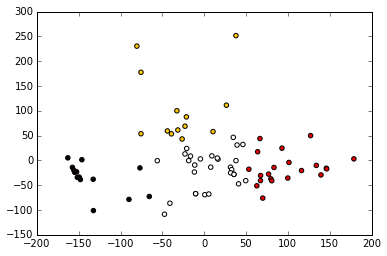

numpy.ndarray

In [55]:
pca = PCA(n_components=2)
pca.fit(model_data)
transformed_model_data = pca.transform(model_data)
kmeans = KMeans(n_clusters = 4)
model_data_predictions = kmeans.fit_predict(transformed_model_data)
plt.scatter(transformed_model_data[:, 0], transformed_model_data[:, 1], c=model_data_predictions, cmap="hot")
plt.show()

In [69]:
cereal_data.dropna().join(pd.DataFrame(model_data_predictions))[["name", "type", 0]].sort(0)

,name,type,0
60,Raisin_Squares,C,0
57,Quaker_Oatmeal,H,0
63,Shredded_Wheat,C,0
26,Frosted_Mini-Wheats,C,0
64,Shredded_Wheat_'n'Bran,C,0
65,Shredded_Wheat_spoon_size,C,0
55,Puffed_Wheat,C,0
54,Puffed_Rice,C,0
66,Smacks,C,0
43,Maypo,H,0


It appears that four groups is the best way to break down the cereal.